# Tarea Examen 3: Física computacional
Ana Belen Sanvicente Méndez

Resuelva los siguientes ejercicios, explicando claramente su razonamiento.

In [ ]:
from pylab import *

Se tiene un oscilador armónico en dos dimensiones (xy) en el que la fuerza está dada por    $\vec F = -k \vec r$      y
se tiene una fricción   $ \vec f_{fricc} = -\mu v^{\frac{3}{2}} \hat v$  , pero cuando   > 1 la fricción es    . Si
$m = 1, k = 1, γ = 0.1 ,  \mu = 0.2$, resuelva las siguientes ejercicios:

(a) Encuentre las ecuaciones de movimiento en coordenadas cartesianas. No es necesario resolver las
ecuaciones.

(b) Utilice el método de Runge-Kutta de 4to orden para encontrar la solución a las ecuaciones de
movimiento en el inciso anterior con condiciones iniciales $ \vec r_0 = (0, 1)$ y $ \vec v_0 = (2 cos θ, 2 sin θ)$, donde
$θ = \frac{n\pi}{6} $
con $n = 0, 1, 2, 3, ..., 10, 11$.

(c)  Genere una función que calcule la energía para las distintas condiciones iniciales y detenga la
simulación cuando esta sea menor al 30 % de su valor inicial. Cabe mencionar que debe hacer su
simulación (paso de integración) de tal manera que el error en la trayectoria no tenga variaciones
de más del 1 % a la trayectoria debe tener, es decir se debe asegurar convergencia a la solución
con error de a lo mas 1 %.

(d) Dibuje las gráficas del momento angular para los casos anteirores en el inciso (1b).

(e) Tome de manera arbitraria alguna condición inicial y dibuje el espacio fase (px, x).

In [ ]:
def RK4(f , t_intervalo , y0 , delta=0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros((len(y0),len(t)))
    sol[:,0] = y0
    for i in range(len(t)-1):
        k1 = f( t[i] , sol[:,i] )
        k2 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k1 )
        k3 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k2 )
        k4 = f( t[i] + delta , sol[:,i] + delta*k3 )
        sol[:,i+1] = sol[:,i] + (delta/6)*(k1 + 2*k2 + 2*k3 + k4)
    return (t,sol)

En el sistema de coordenada cartesiano
tendremos la pocisi[on dada por: $\vec r = (x,y) $ ya que es bidimensional.
Luego: $\vec F = m*a$ y ademas $\vec v = \dot r$, $a = \ddot r$.
Entonces al hacer la sumatoria de fuerzas:

$m\ddot x = -kx - \mu \dot x (\dot x^2 = \dot y^2)^{1/4}$

$m\ddot y = -ky - \mu \dot y (\dot x^2 = \dot y^2)^{1/4}$

Pero si la norma de la velocidad es menor o igual a 1 entonces:

$m\ddot x = -kx - 0.1 \dot x$

$m\ddot y = -ky - 0.1 \dot y$



In [ ]:
#(a) Ec. de mov:
def osc_arm_2d(t,x):
  dx = x[2]
  dy = x[3]
  r = x[2]**2 + x[3]**2
  if r**(1/2) <= 1:
    dvx = -x[0]-0.1*x[2]
    dvy = -x[1]-0.1*x[3]
  else:
    dvx =  -x[0]-0.2*r**(1/2)*x[2]
    dvy =  -x[1]-0.2*r**(1/2)*x[3]

  return array([ dx , dy , dvx , dvy ])

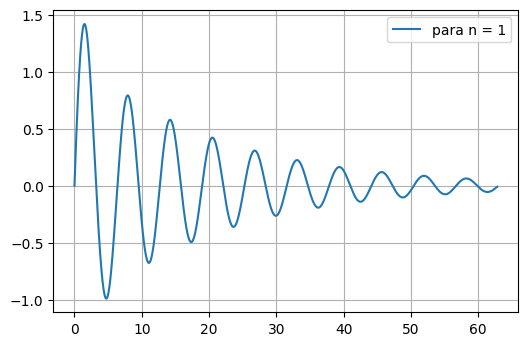

In [ ]:
#(b) Solución con Runge-Kutta
n = 1 # Primer valor de n
figure(dpi=100)
sol = RK4(osc_arm_2d, [0,20*pi], [0,1, 2*cos(n*pi/6),2*sin(n*pi/6)])
plot(sol[0],sol[1][0], label = 'para n = 1') # Gráfica de la solución
grid()
legend()
# Se observa un movimiento amortiguado por la fricción para n =1 

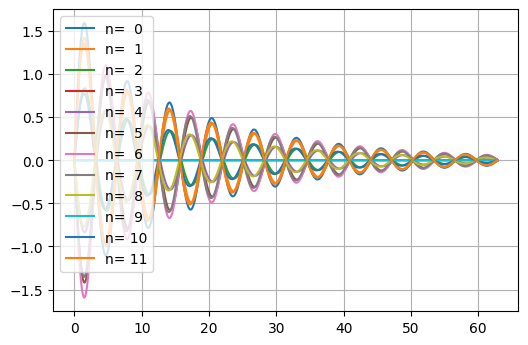

In [ ]:
# Para las demás n's
n=1
figure(dpi= 100)
for i in range(12):
  n = i
  solucion = RK4(osc_arm_2d, [0,20*pi], [0,1, 2*cos(n*pi/6),2*sin(n*pi/6)])
  plot(solucion[0],solucion[1][0],label =r'n= %2.f'%(i))
grid()
legend()
show()

In [ ]:
# (c) Energia
def Energia(x,m=1):
    Ecin = 0.5*m*(x[2]**2+x[3]**2)
    return Ecin

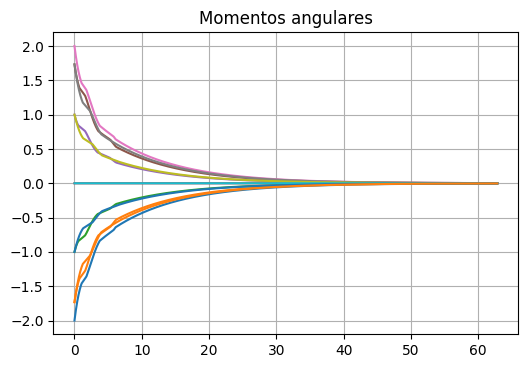

In [ ]:
# (d) Gráficas de momento angular
def Momento(x,y,vx,vy):
    L=[] # Creamos una lista vacía
    for i in range(0,len(x)):
        L.append((x[i]*vy[i]-y[i]*vx[i]))
    return L
figure(dpi=100)
for i in range(12):
    sol=RK4(osc_arm_2d, [0,20*pi], [0,1, 2*cos(i*pi/6),2*sin(i*pi/6)])
    L=Momento(sol[1][0],sol[1][1],sol[1][2],sol[1][3])
    plot(sol[0],L)
title('Momentos angulares')
grid()
show()

2. Suponga que se tiene el sistema como en el problema anterior, pero ahora la partícula tiene carga q > 0
y en el origen también se encuentra una partícula de carga q > 0.


(a) Sin considerar la fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus
argumentos con alguna simulación).

(b) Considerando fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de
estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos
con alguna simulación).

Para esto tendremos las siguientes ecuaciones:
$v_x' = -x + \frac{q^2x}{4\pi \epsilon _0(x^2 + y^2)^{\frac{3}{2}}}$ y $v_y' = -y + \frac{q^2y}{4\pi \epsilon _0(x^2 + y^2)^{\frac{3}{2}}}$

In [ ]:
# (a)
q = 1.60e-19
eps_0 = 8.8542e-12
def mov_cargas(t,x):
  dx =x[2]
  dy = x[3]
  dvx = -x[0] + (q**2/(4*pi*eps_0))**(3/2)
  dvy = -x[1] + (q**2/(4*pi*eps_0))**(3/2)
  return array([dx,dy,dvx,dvy])

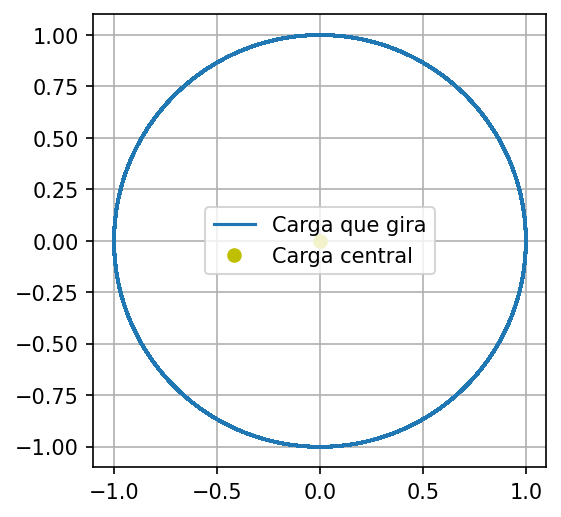

In [ ]:
sol2 = RK4(mov_cargas,[0,700*pi],[0,1,1,0])
figure(dpi=150)
plot(sol2[1][0],sol2[1][1], label ='Carga que gira')
plot([0],[0],'yo', label = 'Carga central')
gca().set_aspect('equal')
legend()
grid()

In [ ]:
# (b) El sistema no puede tener órbitas cerradas debido a la fricción, para hacer la simulacion se modifica la funcion anterior a;adiento la friccion en la sumatoria de fuerzas
def mov_cargasf(t,x):
  dx =x[2]
  dy = x[3]
  v = x[2]**2 + x[3]**2
  #introducimos un condicional para el modulo de la v
  if v**(1/2) <1:
    dvx = -x[0]-0.1*x[2]+ (q**2/(4*pi*eps_0))*x[0]/(v**(3/2))
    dvy = -x[1]-0.1*x[3]+ (q**2/(4*pi*eps_0))*x[1]/(v**(3/2))
  else:
    dvx = -x[0]-0.2*(v**2)*x[2]+ (q**2/(4*pi*eps_0))*x[0]/(v**(3/2))
    dvy = -x[1]-0.2*(v**2)*x[3]+ (q**2/(4*pi*eps_0))*x[1]/(v**(3/2))
  return array([dx,dy,dvx,dvy])

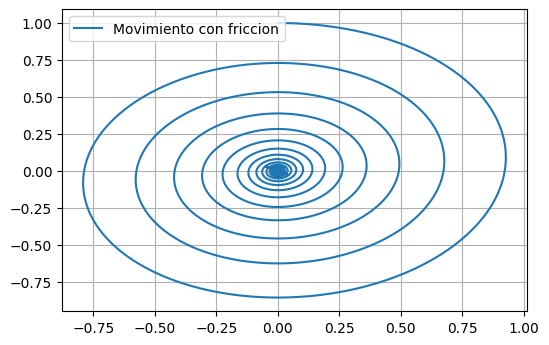

In [ ]:
# Graficacion
figure(dpi=100)
sol3 = RK4(mov_cargasf, [0,700*pi,100],[0,1,1,0])
plot(sol3[1][0],sol3[1][1], label = 'Movimiento con friccion')
legend()
grid()
